## Lab - TensorRT + Profiling - YOLOv4-Tiny TensorRT
## E6692 Spring 2022


In this notebook we outline the steps for converting your trained Darknet YOLOv4-Tiny model from the previous lab (Lab-YOLOv4-Tiny) to a TensorRT model. We use the scripts **utils/yolo2onnx.py** to first convert the Darknet model to ONNX. ONNX stands for the Open Neural Network Exchange, and is a standardized format for converting machine learning and deep learning models between frameworks. Once you have an ONNX version of YOLOv4-Tiny, we use the script **utils/onnx2tensorrt.py** to convert from ONNX to TensorRT automatically using the ONNX parser. 

In [1]:
# TODO: install onnx 1.4.1

!pip3 install onnx==1.4.1

    100% |################################| 2.9MB 178kB/s eta 0:00:01
    100% |################################| 81kB 4.0MB/s eta 0:00:01
  Running setup.py bdist_wheel for onnx ... done
  Stored in directory: /root/.cache/pip/wheels/c5/00/a9/a7cfb520da479a257975b5d25a2126f57360a7e2f0e818943a
  Running setup.py bdist_wheel for typing ... done
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built onnx typing
  Found existing installation: onnx 1.10.1
    Uninstalling onnx-1.10.1:
      Successfully uninstalled onnx-1.10.1


**TODO:** Use the command `python3 yolo2onnx.py <cfg_path> <weights_path> <onnx_model_path>` to generate an ONNX graph from the darknet YOLOv4-Tiny model you trained in the previous lab. `cfg_path` specifies the Darknet configuration file path, `weights_path` specifies the Darknet weights file path, and `onnx_model_path` specifies the path where the ONNX graph will be saved.

**TODO:** Navigate to the **plugins** directory and enter the command `make` to compile the **yolo_layer** plugin code.

### Why did we have to do that? What is yolo_layer?

**TODO:** Your answer here.

Yolo layers are cuda layers, to use yolo_layer, we need to compile them to executable.

**TODO:** Use the command `python3 onnx2tensorrt.py -cfg <cfg_path> -o <onnx_path> -t <trt_model_path>` to generate a serialized TensorRT engine for YOLOv4-Tiny. `cfg_path` is the path to the Darknet model configuration file, `onnx_path` is the path to the onnx model graph, and `trt_model_path` is the path that the serialized TensorRT engine will be written to.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

from utils.yoloTRT import TrtYOLO
from utils.utils import draw_bboxes

trt_engine = './engines/yolov4-tiny-person-vehicle.trt'
test_frames = './test_frames'

CONF_THRESH = 0.4

%load_ext autoreload
%autoreload 2

**TODO:** Load the YOLOv4-Tiny TensorRT engine with **TrtYOLO()** in **yoloTRT.py**. This class has all the functions needed for inference with the TensorRT version of YOLO.

In [4]:
# TODO: load the TRT YOLOv4-Tiny with TrtYOLO()
trtyolo_model = TrtYOLO(trt_engine)

**TODO:** In **test_frames** there are several images taken from the Mudd building cameras and other intersections in NYC. Use the TensorRT YOLOv4-Tiny model to perform inference on all the test frames. Do the inference and display the detected images below:

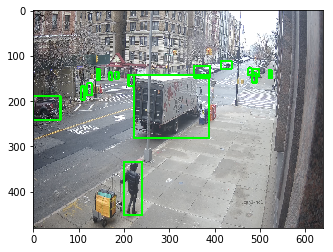

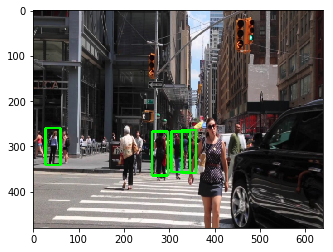

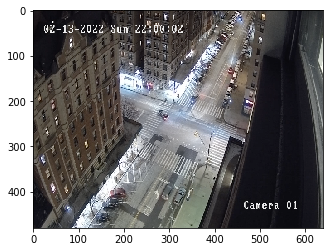

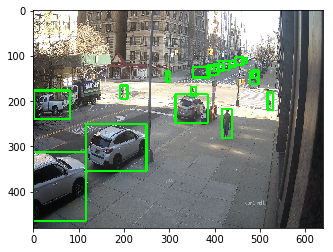

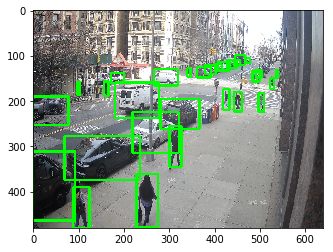

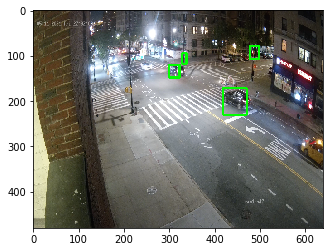

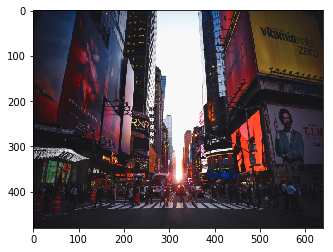

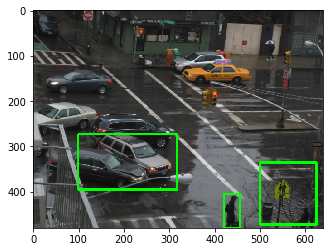

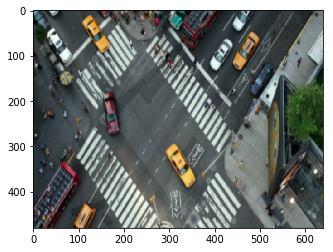

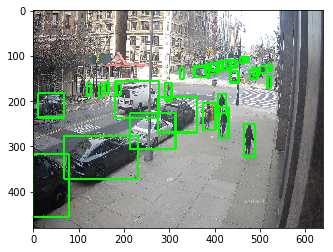

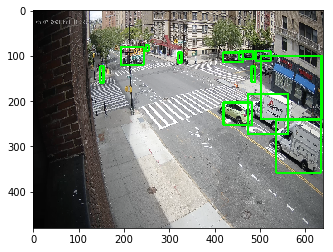

In [15]:
# TODO: do inference with TRT YOLOv4-Tiny and display the detections

img_path_list= [file for file in os.listdir(test_frames) if file.endswith('.png')]
for img_path in img_path_list:
    img = cv2.imread(os.path.join(test_frames, img_path))
    img = cv2.resize(img,(640,480))
    boxes, scores, classes = trtyolo_model.detect(img)
    img = draw_bboxes(img, boxes, scores)
    plt.figure()
    plt.imshow(img[:,:,::-1])
    plt.show()

## Comment on the effectiveness of the detection. How does the model generalize to new traffic intersection domains? (1st floor, 2nd floor, 12th floor, and other intersection scenes)

**TODO:** Your answer here.


For the training dataset domain, which is 1nd floor, the model performs very good. For images from 2nd floor dataset, the result is ok, because 1st floor and 2nd floor are similar datasets. However, for 12 floor and other intersections, the model performs relatively bad, so the generalization ability of this model is not good. This is because our dataset is only taken from a specific domain which is 1st floor and we don't have samples representing other intersections. 

From the statistic learning theory perspective (I just learned it on machine learning course), the VC dimension for deep model (universal approximator) is infinite, so the data needed is actually infinite to learn the pattern of the distribution where data are drawn. This tells us that we want the dataset as larger as possible for training a deep model and gives a great generalization ability. But if our goal is specifically focus on the 1st floor, then we actually don't need that much data to make the model performs well on this particular domain.